In [138]:
import numpy as np
import pandas as pd
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [139]:
a=pd.read_csv("Heart.csv")

In [140]:
a.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [141]:
a.shape

(1025, 14)

In [142]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [143]:
a.isnull().sum()[a.isnull().sum()*100/a.shape[0]>40]

Series([], dtype: int64)

In [144]:
# There are no null values and all columns are in integer or float so no need to use labelEncoder
from sklearn.model_selection import train_test_split
a_train,a_test=train_test_split(a,test_size=0.2,random_state=42)

In [145]:
a_train_x=a_train.iloc[:,:-1]
a_train_y=a_train.iloc[:,-1]

In [146]:
a_test_x=a_test.iloc[:,:-1]
a_test_y=a_test.iloc[:,-1]

In [147]:
from sklearn.linear_model import LogisticRegression
le=LogisticRegression(max_iter=1000)
le.fit(a_train_x,a_train_y)

LogisticRegression(max_iter=1000)

In [148]:
pred=le.predict(a_test_x)
pred

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [149]:
from sklearn.metrics import confusion_matrix
confusion_matrix(a_test_y,pred)

array([[73, 29],
       [13, 90]], dtype=int64)

In [150]:
from sklearn.metrics import accuracy_score
accuracy_score(a_test_y,pred)

0.7951219512195122

In [151]:
from sklearn.metrics import recall_score
recall_score(a_test_y,pred)

0.8737864077669902

In [152]:
from sklearn.metrics import precision_score
precision_score(a_test_y,pred)

0.7563025210084033

In [153]:
from sklearn.metrics import f1_score
f1_score(a_test_y,pred)

0.8108108108108109

In [154]:
pred_proba=le.predict_proba(a_test_x)
pred_proba

array([[2.76044065e-02, 9.72395594e-01],
       [3.66311495e-03, 9.96336885e-01],
       [9.83822337e-01, 1.61776633e-02],
       [3.27535970e-02, 9.67246403e-01],
       [9.53818292e-01, 4.61817081e-02],
       [3.32755170e-01, 6.67244830e-01],
       [9.92068664e-01, 7.93133583e-03],
       [9.95231001e-01, 4.76899926e-03],
       [1.58117529e-01, 8.41882471e-01],
       [9.83153909e-01, 1.68460911e-02],
       [2.22444928e-02, 9.77755507e-01],
       [9.98070136e-01, 1.92986386e-03],
       [1.23925402e-01, 8.76074598e-01],
       [1.29759205e-01, 8.70240795e-01],
       [9.28595214e-01, 7.14047855e-02],
       [5.94400289e-02, 9.40559971e-01],
       [9.92651575e-01, 7.34842496e-03],
       [2.27626601e-02, 9.77237340e-01],
       [2.41481221e-01, 7.58518779e-01],
       [9.87926590e-01, 1.20734095e-02],
       [1.88570642e-01, 8.11429358e-01],
       [9.46766267e-01, 5.32337326e-02],
       [5.03387050e-01, 4.96612950e-01],
       [9.97278722e-01, 2.72127785e-03],
       [1.885706

In [155]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc_auc_score(a_test_y,pred)

0.7947363411383972

In [156]:
fpr,tpr,ther=roc_curve(a_test_y,pred_proba[:,1])

Text(0.5, 0.5, 'Auroc=79.47')

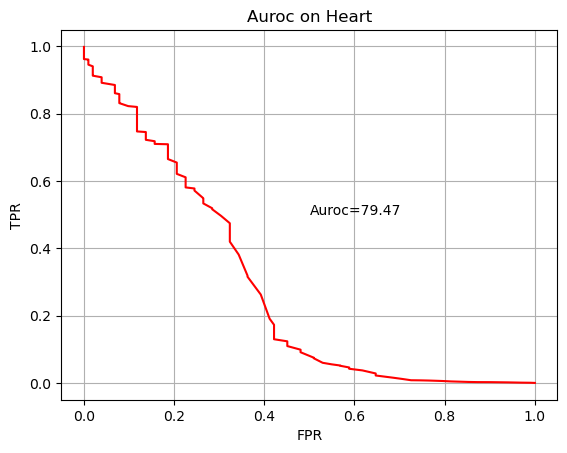

In [157]:
import matplotlib.pyplot as plt
plt.plot(fpr,ther,color="r")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Auroc on Heart")
plt.grid()
plt.text(x=.5,y=.5,s="Auroc=79.47")

In [158]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion="gini",max_depth=7,min_samples_split=20)
dtree.fit(a_train_x,a_train_y)

DecisionTreeClassifier(max_depth=7, min_samples_split=20)

In [159]:
pred1=dtree.predict(a_test_x)
pred1

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [160]:
from sklearn.metrics import confusion_matrix
confusion_matrix(a_test_y,pred1)

array([[87, 15],
       [15, 88]], dtype=int64)

In [161]:
from sklearn.metrics import accuracy_score
accuracy_score(a_test_y,pred1)

0.8536585365853658

In [162]:
from sklearn.model_selection import GridSearchCV
search={"criterion":["gini","entropy"],
       "max_depth":(5,6,7,8),
       "min_samples_split":(20,40,60)}

In [163]:
grid=GridSearchCV(dtree,param_grid=search)
grid.fit(a_train_x,a_train_y)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=7,
                                              min_samples_split=20),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': (5, 6, 7, 8),
                         'min_samples_split': (20, 40, 60)})

In [164]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 20}

In [165]:
from sklearn.ensemble import RandomForestClassifier
ran=RandomForestClassifier(n_estimators=59,bootstrap=False,min_samples_split=20,max_depth=39)
ran.fit(a_train_x,a_train_y)

RandomForestClassifier(bootstrap=False, max_depth=39, min_samples_split=20,
                       n_estimators=59)

In [166]:
pred2=ran.predict(a_test_x)
pred2

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [167]:
from sklearn.metrics import confusion_matrix
confusion_matrix(a_test_y,pred2)

array([[97,  5],
       [ 6, 97]], dtype=int64)

In [168]:
from sklearn.metrics import accuracy_score
accuracy_score(a_test_y,pred2)

0.9463414634146341

In [169]:
from sklearn.model_selection import GridSearchCV
search={"n_estimators":[2,3,8,59,60],
       "max_depth":(5,6,7,8,39,80),
       "min_samples_split":(20,40,60),
       "bootstrap":(True,False)}

In [170]:
grid=GridSearchCV(ran,param_grid=search)
grid.fit(a_train_x,a_train_y)

GridSearchCV(estimator=RandomForestClassifier(bootstrap=False, max_depth=39,
                                              min_samples_split=20,
                                              n_estimators=59),
             param_grid={'bootstrap': (True, False),
                         'max_depth': (5, 6, 7, 8, 39, 80),
                         'min_samples_split': (20, 40, 60),
                         'n_estimators': [2, 3, 8, 59, 60]})

In [171]:
grid.best_params_

{'bootstrap': False,
 'max_depth': 80,
 'min_samples_split': 20,
 'n_estimators': 59}

In [172]:
from sklearn.naive_bayes import MultinomialNB
m=MultinomialNB()
m.fit(a_train_x,a_train_y)

MultinomialNB()

In [173]:
pred3=m.predict(a_test_x)

In [174]:
pred3

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [175]:
from sklearn.metrics import confusion_matrix
confusion_matrix(a_test_y,pred3)

array([[66, 36],
       [28, 75]], dtype=int64)

In [176]:
from sklearn.metrics import accuracy_score
accuracy_score(a_test_y,pred3)

0.6878048780487804

In [178]:
final=pd.DataFrame({"Models":["LR","DT","RF","NB"],
                   "ACC":[accuracy_score(a_test_y,pred),
                          accuracy_score(a_test_y,pred1),
                          accuracy_score(a_test_y,pred2),
                          accuracy_score(a_test_y,pred3)]})
final

,Models,ACC
0,LR,0.795122
1,DT,0.853659
2,RF,0.946341
3,NB,0.687805
